In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
thetas = np.load("./theta_weight_v2/thetas.npy")

In [3]:
no_pooltheta = np.load("./theta_weight_v2/non_pooltheta.npy")

In [4]:
meta_file = "../../data/meta.txt"
with open(meta_file) as f:meta_list = [int(line.strip()) for line in f.readlines()[1:]]

In [5]:
meta_list = np.array(meta_list)

In [6]:
theta0 = thetas[meta_list==0]

In [7]:
sns.set(style='dark')
sns.set_style("dark", {"axes.facecolor": "#e9f3ea"})#修改背景色


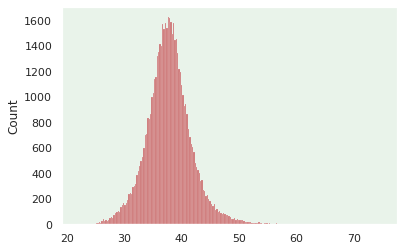

In [8]:
sns.histplot(data=thetas,color='r')
plt.show()

In [23]:
idx_file = "../../data/train_list.txt"
with open(idx_file) as f:idx_list = [line.strip() for line in f.readlines()]

In [28]:
idx_list = np.array(idx_list)

In [33]:
idx_list.__len__() == meta_list.__len__()

True

In [42]:
drop_idx_list = []
drop_meta_list = []
for rowidx in range(thetas.shape[0]):
    if thetas[rowidx] <= 45:
        if rowidx == 51388:
            rowidx = 44644
        if idx_list[rowidx] not in drop_idx_list:
            drop_idx_list.append(idx_list[rowidx])
            drop_meta_list.append(meta_list[rowidx])


In [44]:
with open('../../data/train_drop_list_tre45.txt','w') as f:
    for idx in drop_idx_list:
        f.write(idx+"\n")

In [46]:
with open('../../data/meta_drop_list_tre45.txt','w') as f:
    for meta in drop_meta_list:
        f.write(str(meta)+"\n")

1000

In [32]:
thetas[0]

45.493614

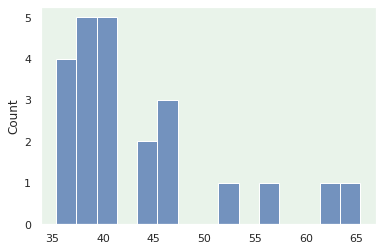

In [9]:
sns.histplot(data=theta0,binwidth=2,color='b')
plt.show()

In [10]:
theta924 = thetas[meta_list==924]
print(theta924.shape)

(128,)


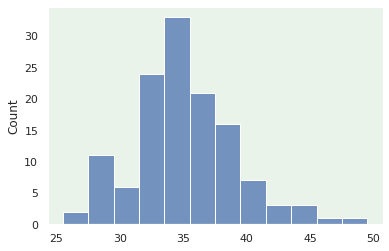

In [11]:
sns.histplot(data=theta924,binwidth=2,color='b')
plt.show()

In [12]:
no_pooltheta.shape

(55013, 3)

In [13]:
no_pooltheta924 = no_pooltheta[meta_list==0]

No handles with labels found to put in legend.
No handles with labels found to put in legend.


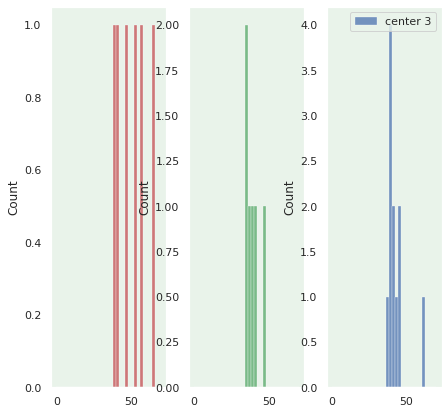

In [14]:
f,axes=plt.subplots(1,3,figsize=(7,7),sharex=True)
sns.histplot(data=no_pooltheta924[:,0],binwidth=2,binrange=(0,70),color='r',label='center 1',ax=axes[0])
plt.legend()
sns.histplot(data=no_pooltheta924[:,1],binwidth=2,binrange=(0,70),color='g',label='center 2',ax=axes[1])
plt.legend()
sns.histplot(data=no_pooltheta924[:,2],binwidth=2,binrange=(0,70),color='b',label='center 3',ax=axes[2])
plt.legend()

In [15]:
no_pooltheta924[:,1]

array([79.52085 , 79.60061 , 87.96665 , 82.72986 , 80.579994, 77.905174,
       38.31118 , 80.64866 , 80.05958 , 78.1524  , 35.781704, 36.6796  ,
       35.357758, 78.326035, 83.08761 , 40.208744, 80.73936 , 46.977028,
       93.33278 , 91.8286  , 92.03334 , 90.71099 , 81.715225],
      dtype=float32)

In [16]:
no_pooltheta924[:,0]

array([91.30747 , 83.40834 , 41.31949 , 38.942024, 87.48411 , 85.10807 ,
       86.01404 , 80.45875 , 84.58293 , 87.8003  , 88.81667 , 93.37871 ,
       92.5661  , 86.17521 , 92.30144 , 89.46594 , 84.930244, 94.666794,
       46.30136 , 64.63982 , 57.203037, 53.116222, 83.34072 ],
      dtype=float32)

In [17]:
no_pooltheta924[:,2]

array([45.493614, 39.03074 , 84.01618 , 79.16861 , 44.166428, 38.47771 ,
       81.38643 , 39.7603  , 38.425064, 36.826477, 76.670616, 79.65802 ,
       78.993614, 43.51226 , 61.56605 , 80.65934 , 40.17734 , 75.83776 ,
       90.348976, 87.48905 , 83.30639 , 79.271164, 41.109688],
      dtype=float32)

## decide dominant class

In [24]:
class_num = np.zeros((1000,3))

In [25]:
for idx in range(1000):
    thetatmp = no_pooltheta[meta_list==idx]
    for row in range(thetatmp.shape[0]):
        v_lst = list((thetatmp[row][0],thetatmp[row][1],thetatmp[row][2]))
        index = v_lst.index(min(v_lst))
        class_num[idx][index] += 1

In [20]:
class_num

array([[ 6.,  6., 11.],
       [32.,  6., 54.],
       [ 5., 51.,  2.],
       ...,
       [ 2.,  1., 34.],
       [ 0.,  0., 47.],
       [78.,  1.,  0.]])

In [24]:
weight = np.load("./theta_weight_v2/weight.npy")

In [25]:
weight.shape

(1000, 3, 512)

In [26]:
dominant_index = np.zeros(1000)
for idx in range(1000):
    v_lst = list(class_num[idx])
    dominant_index[idx] = v_lst.index(max(v_lst))

In [40]:
weight_drop = np.zeros((1000,1,512))

In [41]:
for idx in range(1000):
    weight_drop[idx]=weight[idx,int(dominant_index[idx]),:]

In [44]:
np.save("../losses/subarc_weight/weight_drop.npy",weight_drop)

In [45]:
weight_reload = np.load("../losses/subarc_weight/weight_drop.npy")

In [46]:
weight_reload.shape

(1000, 1, 512)

array([2., 2., 1., 2., 0., 2., 1., 1., 2., 1., 1., 1., 0., 2., 0., 1., 2.,
       1., 2., 1., 2., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 2., 1., 0.,
       2., 2., 0., 1., 2., 2., 0., 1., 0., 1., 2., 2., 2., 2., 2., 0., 2.,
       2., 0., 2., 2., 0., 2., 1., 1., 2., 2., 1., 2., 2., 0., 0., 2., 0.,
       1., 1., 2., 0., 0., 1., 2., 0., 1., 2., 2., 2., 1., 1., 2., 1., 2.,
       0., 0., 0., 2., 1., 0., 1., 2., 2., 0., 1., 2., 1., 1., 2., 1., 1.,
       0., 2., 2., 0., 1., 1., 0., 0., 1., 2., 1., 2., 0., 2., 1., 1., 1.,
       2., 1., 0., 0., 2., 0., 0., 0., 1., 0., 2., 2., 0., 1., 1., 1., 2.,
       0., 0., 1., 1., 0., 2., 1., 1., 1., 1., 2., 1., 0., 2., 0., 0., 0.,
       2., 2., 2., 1., 0., 1., 1., 2., 0., 2., 0., 2., 0., 0., 2., 1., 1.,
       1., 0., 2., 0., 2., 2., 1., 2., 0., 2., 1., 2., 1., 2., 1., 2., 0.,
       1., 2., 1., 1., 1., 1., 2., 2., 0., 1., 0., 1., 2., 1., 1., 0., 1.,
       0., 0., 2., 2., 0., 2., 0., 1., 2., 0., 0., 2., 2., 1., 0., 2., 1.,
       0., 1., 2., 2., 2.